In [246]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
def convert_to_num(x):
    substrings = x.split(' ')
    if "Crore" in x :
        return int(substrings[0])*10000000
    elif "Lac" in x :
        return int(substrings[0])*100000
    elif "Thou" in x :
        return int(substrings[0])*1000
    elif "Hund" in x :
        return int(substrings[0])*100
    elif "None" in x :
        return 0
    else :
        return int(substrings[0])
    

num_liability = [convert_to_num(x) for x in train_data['Liabilities']]
num_assets = [convert_to_num(x) for x in train_data['Total Assets']]

train_data['Total Assets'] = num_assets
train_data['Liabilities'] = num_liability

num_liability = [convert_to_num(x) for x in test_data['Liabilities']]
num_assets = [convert_to_num(x) for x in test_data['Total Assets']]

test_data['Total Assets'] = num_assets
test_data['Liabilities'] = num_liability

In [247]:
y = train_data['Education']

X = train_data.drop(columns=['ID','Education'], axis = 1)
XX = test_data.drop(columns=['ID'], axis = 1)

X = pd.get_dummies(X, columns = ['Party', 'state'])
XX = pd.get_dummies(XX, columns = ['Party', 'state'])

def constituency_labelling(x):
    if "SC" in x :
        return 1
    elif "ST" in x :
        return 0
    else :
        return 2

def candidate_labelling(x):
    if "Adv." in x or "Dr." in x :
        return 1
    else :
        return 0

XX['Constituency ∇'] = [constituency_labelling(x) for x in XX['Constituency ∇']]
X['Constituency ∇'] = [constituency_labelling(x) for x in X['Constituency ∇']]

XX['Candidate'] = [candidate_labelling(x) for x in XX['Candidate']]
X['Candidate'] = [candidate_labelling(x) for x in X['Candidate']]
# print(X.head())
# print(XX.head())

   Candidate  Constituency ∇  Criminal Case  Total Assets  Liabilities  \
0          0               2              4    2110000000     20000000   
1          0               1              0      10000000            0   
2          1               2              0      70000000      2200000   
3          0               2              0      90000000      2400000   
4          0               1              2      20000000      6100000   

   Party_AAP  Party_AIADMK  Party_AITC  Party_BJD  Party_BJP  ...  \
0      False         False       False      False      False  ...   
1      False         False       False      False       True  ...   
2      False         False       False      False      False  ...   
3      False         False       False      False       True  ...   
4      False         False       False      False       True  ...   

   state_ODISHA  state_PUDUCHERRY  state_PUNJAB  state_RAJASTHAN  \
0         False             False         False            False   
1   

In [248]:
education_labelling = {
    'Others' : 0,
    'Literate' : 1,
    '5th Pass' : 2,
    '8th Pass' : 3,
    '10th Pass' : 4,
    '12th Pass' : 5,
    'Graduate' : 6,
    'Graduate Professional' : 7,
    'Post Graduate' : 8,
    'Doctorate' : 9,
}
y = [education_labelling[x] for x in y]

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = BernoulliNB(alpha=0.35, binarize=0.0, fit_prior=True, class_prior=None)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.2354368932038835


In [251]:
y_pred = best_model.predict(XX)
#y_pred

In [252]:
y_pred = [list(education_labelling.keys())[x] for x in y_pred]
#y_pred

In [253]:
output_df = pd.DataFrame({'ID': test_data['ID'], 'Education': y_pred})
output_df.to_csv('final_output_alpha=35_new.csv', index=False)

In [254]:
# make a graph with percentage of candidates with criminal cases more than 3 in each party
party = train_data['Party'].unique()
party_df = pd.DataFrame(columns = ['Party', 'Count'])
party_df['Party'] = party
party_df['Count'] = [0]*len(party)


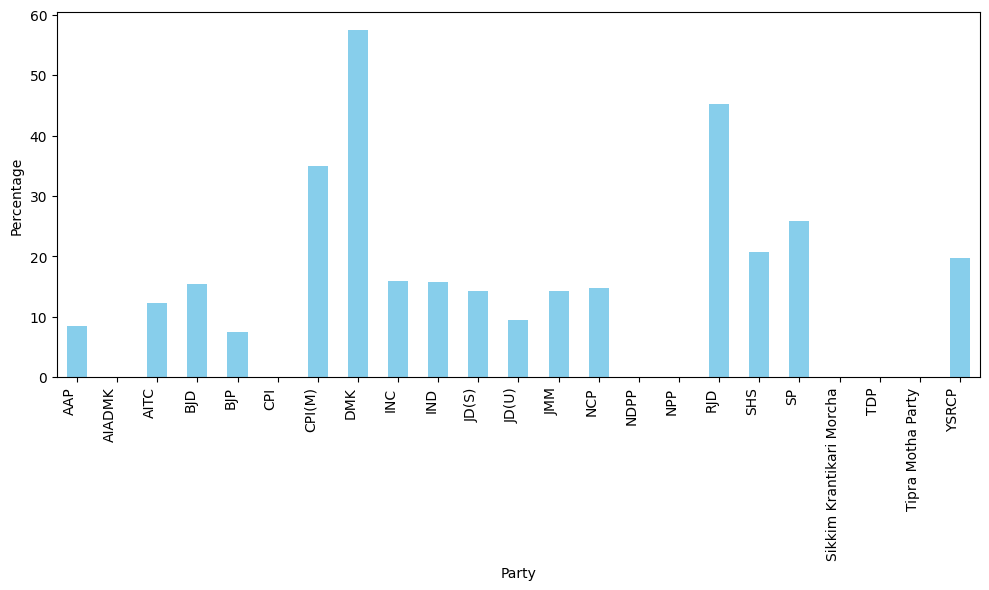

In [255]:
import matplotlib.pyplot as plt

filtered_data = train_data[train_data['Criminal Case'] > 3]

count_per_party = filtered_data['Party'].value_counts()

total_count_per_party = train_data['Party'].value_counts()

percentage_per_party = (count_per_party / total_count_per_party) * 100

plt.figure(figsize=(10, 6))
percentage_per_party.plot(kind='bar', color='skyblue')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('Figure 1.png')
plt.show()


In [256]:
# make a graph with percentage of candidates with criminal cases more than 3 in each state
state = train_data['state'].unique()
state_df = pd.DataFrame(columns = ['State', 'Count'])
state_df['State'] = state
state_df['Count'] = [0]*len(state)
# state_df


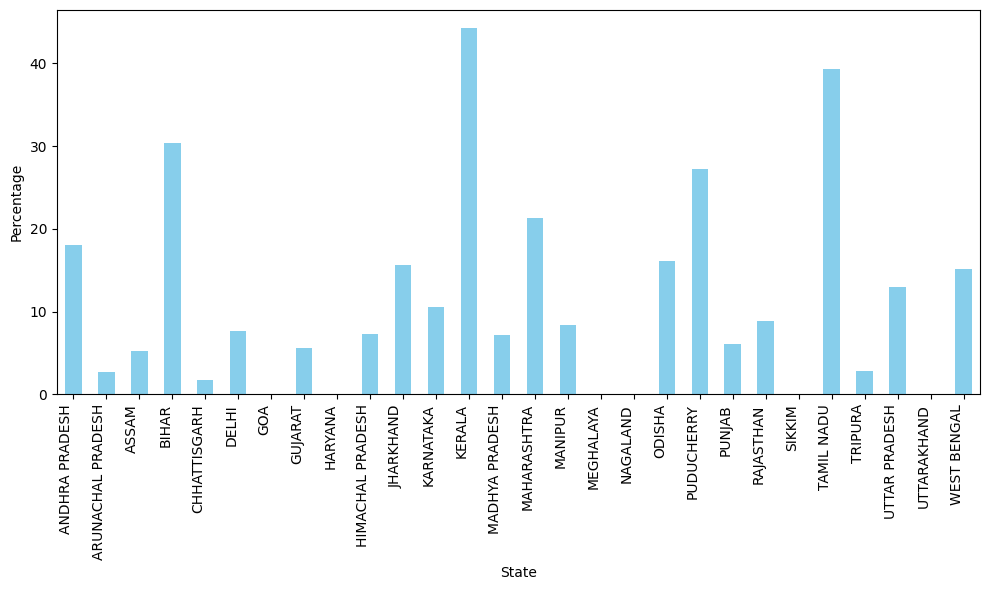

In [257]:
import matplotlib.pyplot as plt

filtered_data = train_data[train_data['Criminal Case'] > 3]
count_per_state = filtered_data['state'].value_counts()
total_count_per_state = train_data['state'].value_counts()
percentage_per_state = (count_per_state / total_count_per_state) * 100
plt.figure(figsize=(10, 6))
percentage_per_state.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('Figure 2.png')
plt.show()


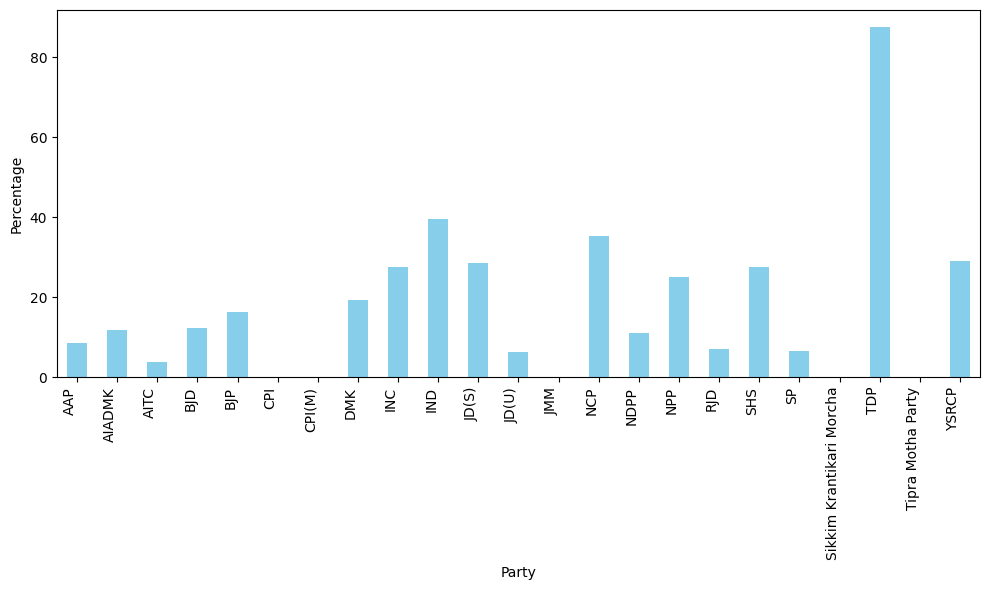

In [258]:
# make graph of percentage of candidates with wealth more than 5 crore in each party, wealth = total assets - liabilities
# train_data['Total Assets'] = num_assets
# train_data['Liabilities'] = num_liability
train_data['Wealth'] = train_data['Total Assets'] - train_data['Liabilities']
filtered_data = train_data[train_data['Wealth'] > 100000000]
count_per_party = filtered_data['Party'].value_counts()
total_count_per_party = train_data['Party'].value_counts()
percentage_per_party = (count_per_party / total_count_per_party) * 100
plt.figure(figsize=(10, 6))
percentage_per_party.plot(kind='bar', color='skyblue')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('Figure 3.png')
plt.show()

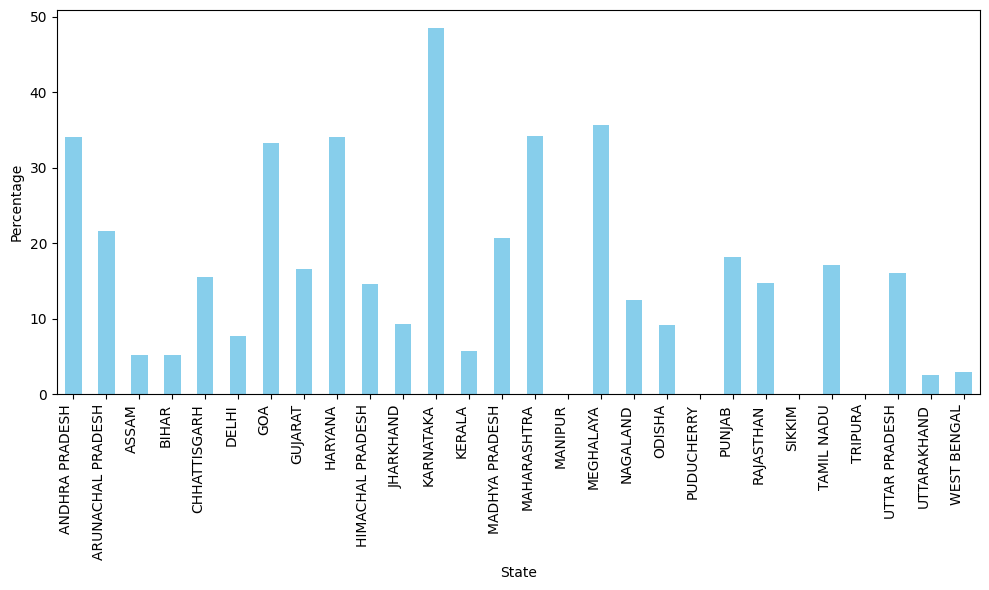

In [259]:
# make graph of percentage of candidates with wealth more than 5 crore in each state, wealth = total assets - liabilities
filtered_data = train_data[train_data['Wealth'] > 100000000]
count_per_state = filtered_data['state'].value_counts()
total_count_per_state = train_data['state'].value_counts()
percentage_per_state = (count_per_state / total_count_per_state) * 100
plt.figure(figsize=(10, 6))
percentage_per_state.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('Figure 4.png')
plt.show()


<Figure size 1000x600 with 0 Axes>

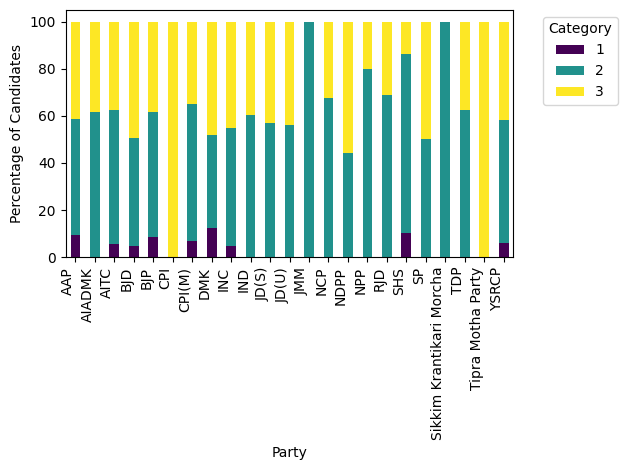

In [260]:
import seaborn as sns
# make categories 1,2,3 in education for 0 to 3, 4 to 6, 7 to 9 as in labelling
category_labelling = {
    'Others' : 1,
    'Literate' : 1,
    '5th Pass' : 1,
    '8th Pass' : 1,
    '10th Pass' : 2,
    '12th Pass' : 2,
    'Graduate' : 2,
    'Graduate Professional' : 3,
    'Post Graduate' : 3,
    'Doctorate' : 3,
}
train_data['Category'] = train_data['Education'].map(category_labelling)

party_total_counts = train_data['Party'].value_counts()

party_category_counts = train_data.groupby(['Party', 'Category']).size().unstack(fill_value=0)

party_category_percentages = party_category_counts.div(party_total_counts, axis=0) * 100

plt.figure(figsize=(10, 6))  
party_category_percentages.plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel('Party')
plt.ylabel('Percentage of Candidates')
# plt.title('Percentage of Education Categories by Party')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('Figure 5.png', bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

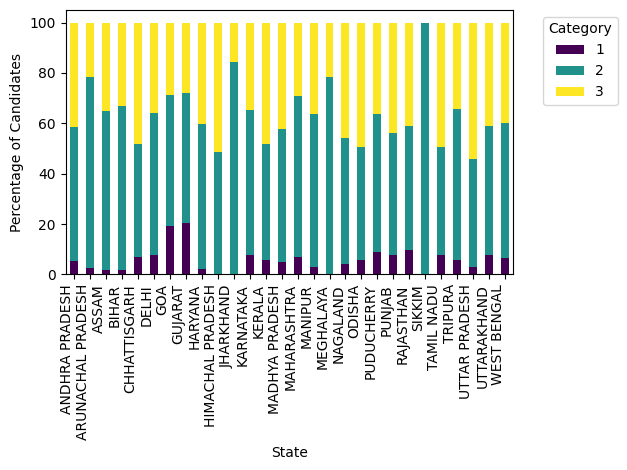

In [261]:
state_total_counts = train_data['state'].value_counts()

state_category_counts = train_data.groupby(['state', 'Category']).size().unstack(fill_value=0)

state_category_percentages = state_category_counts.div(state_total_counts, axis=0) * 100

plt.figure(figsize=(10, 6))
state_category_percentages.plot(kind='bar', stacked=True, cmap='viridis')
bar_width = 0.35  # Set the width of the bars

plt.xlabel('State')
plt.ylabel('Percentage of Candidates')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('Figure 6.png', bbox_inches='tight')
plt.show()
